In [1]:
#First step is to import requests. This allows us to use the requests.get() command that is frequently used. 
import requests
#we most import json as a way to manipulate json objects into python objects.
import json
import pandas as pd
import matplotlib.pyplot as plt


# 1.1 Sending requests to an API

You can send omething called, "GET requests" to the API you are working with and store the data into a variable. 

There are many different APIs available and some of them may require to follow certain practices. Here we will be working with a simple open Pokemon API. 

By using the requests.get function, you can send a GET request to the Pokemon API endpoint and save the response in a variable. 

You can then use the json.loads function to decode the json data and save at a python dictionary object.

we can then iterate through the object like we would a normal python dictionary. 

In [2]:
#GET request is sent to the API and the response is saved within the response variable
response = requests.get('https://pokeapi.co/api/v2/pokemon')

#json.loads() extracts json data from the response and places it into a python dictionary and stores it in pokemon_list
pokemon_list = json.loads(response.text)['results']

#prints a list of pokemon names
print('List of Pokémon:')
for pokemon in pokemon_list:
    print('- ' + pokemon['name'])

List of Pokémon:
- bulbasaur
- ivysaur
- venusaur
- charmander
- charmeleon
- charizard
- squirtle
- wartortle
- blastoise
- caterpie
- metapod
- butterfree
- weedle
- kakuna
- beedrill
- pidgey
- pidgeotto
- pidgeot
- rattata
- raticate


# 1.2 Getting More Info

We can choose a specific pokemon to look at by choosing it's index.

We can then send another GET request to get information on Squirtle and save it to another response variable

We can then look at the documentation of the API: https://pokeapi.co/docs/v2#pokeathlon-stats to see what information we want to see. Here we call for the height and weight of squirtle.

We then loop the Pokemon_details variable, which has been decoded from a json object to a python dictionary object, to find the names of the abilities 



In [3]:
#pulls the name of the pokemon at the 6th index space of the list
pokemon_name = pokemon_list[6]['name']
response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{pokemon_name}')

pokemon_details = json.loads(response.text)

#prints out the pokemon name, height and weight
print(f"Details for {pokemon_name}:")
print(f"Height: {pokemon_details['height']}")
print(f"Weight: {pokemon_details['weight']}")

#loops through the pokemons abilities and prints them out
print("Abilities:")
for ability in pokemon_details['abilities']:
      print('- ' + ability['ability']['name'])

Details for squirtle:
Height: 5
Weight: 90
Abilities:
- torrent
- rain-dish


# 2.1 How to read a CSV file 

To read from a CSV, we must import the Pandas dataframe. This whill allow us to use many of the tools necessary. Once we have imported pandas, we can now read the CSV file with the pd.read_csv function. 

We will also go over how to find all unique instances in a given column.




In [4]:
chords = pd.read_csv('chord-progressions.csv')
chords

,1st chord,2nd chord,3rd chord,4th chord,Progression Quality
6,4,1,5,Alternative,NaN
4,4,1,5,Catchy,NaN
1,1,1,1,Didgeridoo,NaN
1,6,4,5,Dreadful,NaN
1,6,2,5,Dreadful,NaN
1,6,2,4,Endless,NaN
1,3,4,6,Energetic,NaN
1,5,1,4,Folk,NaN
1,6,1,4,Folk,NaN
6,5,4,3,Flamenco,NaN


In [5]:
chords.head()

,1st chord,2nd chord,3rd chord,4th chord,Progression Quality
6,4,1,5,Alternative,NaN
4,4,1,5,Catchy,NaN
1,1,1,1,Didgeridoo,NaN
1,6,4,5,Dreadful,NaN
1,6,2,5,Dreadful,NaN


In [6]:
chords.tail()

,1st chord,2nd chord,3rd chord,4th chord,Progression Quality
1,5,5,1,Simple,NaN
1,4,1,4,Wildside,NaN
1,1,4,6,Wistful,NaN
2,1,5,7,Moody,NaN
2,1,7,6,Moody,NaN


# 2.2 Looking at columns 

we will look at how to isolate a single column and also find all instances of a given a value in a single column. 

In [7]:
chords['4th chord']

6    Alternative
4         Catchy
1     Didgeridoo
1       Dreadful
1       Dreadful
1        Endless
1      Energetic
1           Folk
1           Folk
6       Flamenco
6       Flamenco
1         Grunge
2           Jazz
1           Love
1       Memories
1            Pop
1            Pop
4     Rebellious
1            Sad
1            Sad
1            Sad
5          Sweet
1         Simple
1         Simple
1       Wildside
1        Wistful
2          Moody
2          Moody
Name: 4th chord, dtype: object

In [8]:
# in this code, we are checking if our chords data frame "4th chord" column is equal to "sad"
print(len(chords[chords["4th chord"] == "Sad"]))

3


In [9]:
#here is how we would find all unique entries in the '4th' chord column
emotions = chords['4th chord'].unique()

# 3.1 How to group columns together and merge files into a singular dataframe

Here we are working with my personal spotify data and we have 9 files of the same properties. We want to be able to stack them on top of each other to get one large dataframe. 

The Groupby() function allows us to make the track titles the index and then sorts them by their "ms_played". We can also sort those values by using the .sort_values() function and we can specify if we want it in ascending or descending order. 



In [10]:
#Individually read all files
spotify = pd.read_json("endsong_0.json")
spotify_1 = pd.read_json("endsong_1.json")
spotify_2 = pd.read_json("endsong_2.json")
spotify_3 = pd.read_json("endsong_3.json")
spotify_4 = pd.read_json("endsong_4.json")
spotify_5 = pd.read_json("endsong_5.json")
spotify_6 = pd.read_json("endsong_6.json")
spotify_7 = pd.read_json("endsong_7.json")
spotify_8 = pd.read_json("endsong_8.json")

#Use the concat([]) function and feed in a list of the files that you want to combine.
spotify_merge = pd.concat([spotify,spotify_1,spotify_2,spotify_3,spotify_4,spotify_5,spotify_6,spotify_7,spotify_8], ignore_index = True)
spotify_merge

,ts,username,platform,ms_played,conn_country,ip_addr_decrypted,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,...,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2021-11-03T15:26:24Z,ozrodriguez72,"Android OS 11 API 30 (Google, Pixel 3a)",219914,US,75.139.186.234,unknown,Nandemonaiya - movie ver.,RADWIMPS,Your Name.,...,None,None,None,trackdone,logout,True,NaN,False,1635902621588,False
1,2018-11-02T16:18:37Z,ozrodriguez72,"Android OS 8.1.0 API 27 (LGE, LM-Q710(FGN))",0,US,172.58.24.18,unknown,First Class,Rainbow Kitten Surprise,Seven + Mary,...,None,None,None,fwdbtn,fwdbtn,False,NaN,False,1541175504442,False
2,2020-08-02T20:18:21Z,ozrodriguez72,"Android-tablet OS 7.1.1 API 25 (samsung, SM-T350)",845,US,47.145.238.96,unknown,Me Voy,Julieta Venegas,Limon Y Sal,...,None,None,None,trackdone,endplay,True,NaN,False,1596389555912,False
3,2021-04-06T18:26:06Z,ozrodriguez72,OS X 10.13.6 [x86 4],212473,US,68.189.138.237,unknown,Again (Your Lie in April - Ghibli Piano and Vi...,Seycara Orchestral,Again (Your Lie in April - Ghibli Piano and Vi...,...,None,None,None,trackdone,trackdone,False,NaN,False,1617733352639,False
4,2021-11-10T05:54:42Z,ozrodriguez72,Partner google cast_voice;Google_Home;;5.1.0--...,692,US,2600:6c54:7500:323:1453:efc3:fe8f:241f,Mozilla%2F5.0%20(X11;%20Linux%20armv7l)%20Appl...,Ruthless,The Marías,"Superclean, Vol. II",...,None,None,None,fwdbtn,fwdbtn,False,NaN,False,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129009,2020-11-09T18:01:58Z,ozrodriguez72,"Android-tablet OS 7.1.1 API 25 (samsung, SM-T350)",209765,US,47.145.238.96,unknown,Favorito,Camilo,Por Primera Vez,...,NaN,NaN,NaN,trackdone,trackdone,True,NaN,False,1604944709730,False
129010,2018-05-29T14:47:58Z,ozrodriguez72,"Android OS 7.0 API 24 (LGE, LGMS210)",430,US,172.56.31.210,unknown,Straight into Your Arms - Bonus Track Version,Vance Joy,Dream Your Life Away,...,NaN,NaN,NaN,fwdbtn,fwdbtn,False,NaN,False,1527605249143,False
129011,2019-02-15T00:25:44Z,ozrodriguez72,"Android OS 8.1.0 API 27 (LGE, LM-Q710(FGN))",216600,US,69.75.209.115,unknown,My Eyes,The Lumineers,Cleopatra,...,NaN,NaN,NaN,trackdone,trackdone,False,NaN,False,1550190126272,False
129012,2021-05-04T22:20:41Z,ozrodriguez72,OS X 10.13.6 [x86 4],144253,US,68.189.138.237,unknown,prc,Kensuke Ushio,"A Shape of Light ""A Silent Voice the Movie"" Or...",...,NaN,NaN,NaN,trackdone,trackdone,False,NaN,False,1620166696496,False


In [11]:
# Group the DataFrame by track name and sum the ms_played column
song_play_counts = spotify_merge.groupby("master_metadata_track_name")["ms_played"].sum() / 60000

# Sort the play counts in descending order and display the top 10 songs
top_songs = song_play_counts.sort_values(ascending=False).head(10)
print(top_songs)

master_metadata_track_name
Hallucinogenics                 2962.043333
First Class                     2852.288850
Straight Razor                  2244.217733
Grave Digger                    2157.638650
Heavy                           2118.547017
Me and My Friends Are Lonely    1962.735667
Tribulation                     1912.727383
Cringe                          1890.527233
I Can't Go on Without You       1773.094583
踊り子                             1663.641000
Name: ms_played, dtype: float64


In [12]:
song_play_counts

master_metadata_track_name
"Seishun Sick"                                5.402433
"β" 1                                         2.658050
#1 Customer                                   3.563633
#BrooklynBloodPop!                            2.426833
#UnveilTheBeast                               1.649917
                                                ...   
우주를 건너 Across the universe                    6.324950
이럴거면 그러지말지 Shouldn't Have… (feat. Young K)    3.546017
취향 (Les Préférences) Preference               4.476433
콩떡빙수 - Extreme Summer By East4A               0.705167
행복한 척 Pretend                                 3.705400
Name: ms_played, Length: 9470, dtype: float64

# 3.2 How to make a bar graph

We can make a bar graph by using the matplotlib.pyplot library. Once we have imported the library as "plt" we can use the .plot function. We can specify the type of graph as an argument inside the parenthesis of the .plot function.

We can change the labels of the axis by using the set_xlabel and set_ylabel respectively. The arguments in the parenthesis must be a string object. 

We can also change the title using the set_title function.



C:\Users\ozrod\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36362 (\N{CJK UNIFIED IDEOGRAPH-8E0A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ozrod\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12426 (\N{HIRAGANA LETTER RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ozrod\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23376 (\N{CJK UNIFIED IDEOGRAPH-5B50}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


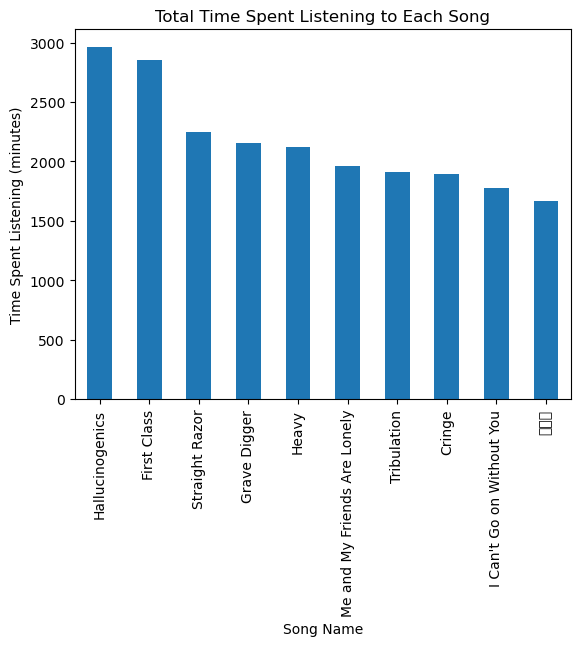

In [12]:
# Create a bar chart of the total time spent listening to each song
song_play_counts_graph = top_songs.plot(kind='bar')

# Set the x-axis label
song_play_counts_graph.set_xlabel('Song Name')

# Set the y-axis label
song_play_counts_graph.set_ylabel('Time Spent Listening (minutes)')

# Set the title of the graph
song_play_counts_graph.set_title('Total Time Spent Listening to Each Song')

# Rotate the x-axis labels for better readability
song_play_counts_graph.tick_params(axis='x', rotation=90)

# Show the plot
plt.show()

# 4.1 How to find the max and min values of a column 

We can find the max values of a column, but first we must use the sort_values() function to sort values in ascending order. Once we have done that, we can use the idxmax function to get the name of the track that has the highest play count and save it as a variable. 

There are two ways that we can save the max play count to a variable we can use the .loc function and feed the name of the top track. That will return the play count for the given track. Another way to find the max play count would be to simply use the max() function but this will only return the max value and cannot be used to find other songs. 

In [13]:
# Sort the play counts in descending order and display the top 10 songs
top_songs = song_play_counts.sort_values(ascending=False).head(10)
print(top_songs)

master_metadata_track_name
Hallucinogenics                 2962.043333
First Class                     2852.288850
Straight Razor                  2244.217733
Grave Digger                    2157.638650
Heavy                           2118.547017
Me and My Friends Are Lonely    1962.735667
Tribulation                     1912.727383
Cringe                          1890.527233
I Can't Go on Without You       1773.094583
踊り子                             1663.641000
Name: ms_played, dtype: float64


In [19]:
# Get the song name with the highest play count
max_song = song_play_counts.idxmax()

# Get the maximum play count for the song
max_play_count = song_play_counts.loc[max_song]

# Print the results
print(f"The song with the highest play count is '{max_song}' with a total play count of {max_play_count:.2f} minutes.")

The song with the highest play count is 'Hallucinogenics' with a total play count of 2962.04 minutes.


In [20]:
# Get the song name with the highest play count
max_song = song_play_counts.idxmax()

# Get the maximum play count for the song
max_play_count = song_play_counts.max()

# Print the results
print(f"The song with the highest play count is '{max_song}' with a total play count of {max_play_count:.2f} minutes.")

The song with the highest play count is 'Hallucinogenics' with a total play count of 2962.04 minutes.
